<a href="https://colab.research.google.com/github/Sikandarh11/Practice-Machine-Learning-Algorithms/blob/main/CNN/UpdatedCNN_(classify_dog_%26_cat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalize
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [28]:
#Creating CNN
model = Sequential()

model.add( Conv2D(32, kernel_size = (3,3), strides = 2, padding = 'valid', activation = 'relu', input_shape=(256,256,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid' ))

model.add(Conv2D(64, kernel_size = (3,3), strides = 2, padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid' ))

model.add(Conv2D(128, kernel_size = (3,3), strides = 2, padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid' ))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 127, 127, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 127, 127, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 31, 31, 64)        256       
 chNormalization)                                                
                                                      

In [29]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [30]:
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 50s 74ms/step - loss: 0.5824 - accuracy: 0.6896 - val_loss: 0.5825 - val_accuracy: 0.6880
Epoch 2/10
625/625 [==============================] - 47s 74ms/step - loss: 0.4529 - accuracy: 0.7888 - val_loss: 0.4866 - val_accuracy: 0.7542
Epoch 3/10
625/625 [==============================] - 43s 68ms/step - loss: 0.3894 - accuracy: 0.8256 - val_loss: 0.4919 - val_accuracy: 0.7592
Epoch 4/10
625/625 [==============================] - 45s 71ms/step - loss: 0.3253 - accuracy: 0.8589 - val_loss: 0.3871 - val_accuracy: 0.8274
Epoch 5/10
625/625 [==============================] - 44s 70ms/step - loss: 0.2754 - accuracy: 0.8828 - val_loss: 0.5294 - val_accuracy: 0.7814
Epoch 6/10
625/625 [==============================] - 45s 72ms/step - loss: 0.2273 - accuracy: 0.9043 - val_loss: 0.5581 - val_accuracy: 0.8012
Epoch 7/10
625/625 [==============================] - 43s 68ms/step - loss: 0.1796 - accuracy: 0.9257 - val_loss: 0.4931 - val_accuracy:

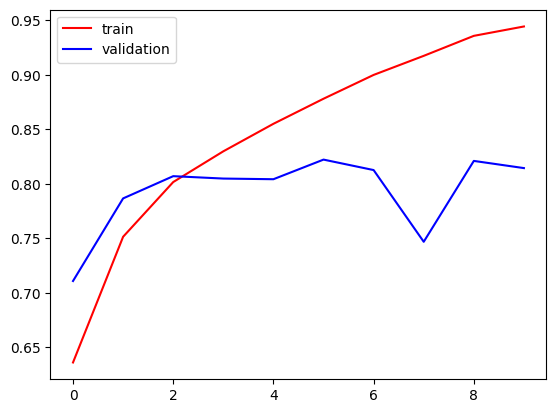

In [17]:
#befoer BatchNormalization, Dropout
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label = 'validation')
plt.legend()
plt.show()

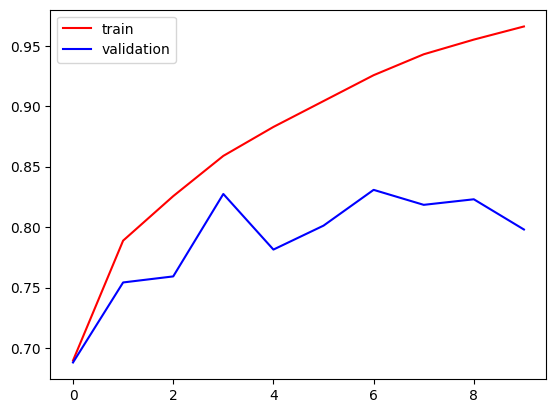

In [31]:
#after BatchNormalization, Dropout
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label = 'validation')
plt.legend()
plt.show()

In [18]:
import cv2
dog = cv2.imread('/content/dog.jpeg')
cat = cv2.imread('/content/cat.jpeg')

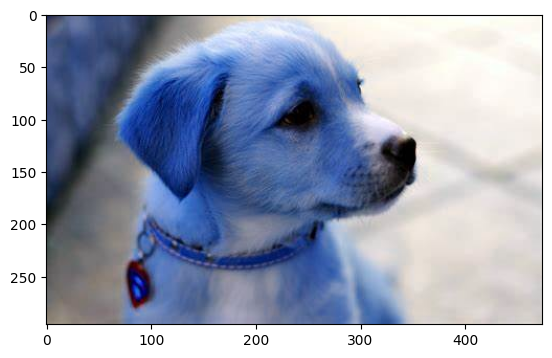

In [19]:
plt.imshow(dog)

In [20]:
dog.shape

(296, 474, 3)

In [23]:
dog = cv2.resize(dog, (256,256))
dog = dog.reshape(1,256,256,3)
dog.shape

(1, 256, 256, 3)

In [32]:
model.predict(dog)

1/1 [==============================] - 0s 102ms/step


array([[0.]], dtype=float32)

In [ ]:
cat = cv2.resize(cat, (256,256))

In [34]:
cat = cat.reshape(1,256,256,3)
model.predict(cat)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)